In [1]:
import math
import numpy as np
import scipy
from numpy import sin, cos, abs, exp, sqrt, arccos, pi

%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ="retina"
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
F_list = np.sqrt(np.linspace(0.01, 2.0, 50)) # Pump
gamma = 5e-2 # Loss rate
t_c = 1.0 # Tunneling
N_c = 500 # Number of cavities
# Cavity-laser coupling
t_l = np.zeros(N_c, dtype=np.complex128)

g = 0.5 # Kerr non-linearity

Delta_list = np.linspace(-2.0, 2.0, 50) # Detuning

In [9]:
def f_RK4(Delta_l, g, gamma, t_c, t_l, a):

    a_l = np.concatenate((np.zeros(1), a[:-1]))
    a_r = np.concatenate((a[1:], np.zeros(1)))

    y = -1.0j * (
        -Delta_l*a + g*abs(a)**2*a -1.0j*gamma*a - t_c*a_l - t_c*a_r + t_l
    )
    
    return y

N_t = 1e3 # Number of time steps
t_f = 1e2 # Final time
t = np.linspace(0, t_f, int(N_t))
Delta_t = t[1] - t[0]

### 4th order RK time evolution

In [10]:
ll_list = []
I_T_list = []

for F in F_list:

    print('==========> F = {:}'.format(F))

    ll_F = []
    I_T_F = []

    t_l[249] = F
    t_l[251] = F

    for Delta_l in Delta_list:

        #print('Delta = {:}'.format(Delta_l))

        # Cavity fields
        a = np.zeros((N_c, int(N_t)), dtype=np.complex128)

        # RK parameters
        k1 = np.zeros(N_c)
        k2 = np.zeros(N_c)
        k3 = np.zeros(N_c)
        k4 = np.zeros(N_c)

        for i_t in range(len(t)-1):
            k1 = f_RK4(Delta_l, g, gamma, t_c, t_l, a[:, i_t])
            k2 = f_RK4(Delta_l, g, gamma, t_c, t_l, a[:, i_t] + k1*Delta_t/2)
            k3 = f_RK4(Delta_l, g, gamma, t_c, t_l, a[:, i_t] + k2*Delta_t/2)
            k4 = f_RK4(Delta_l, g, gamma, t_c, t_l, a[:, i_t] + k3*Delta_t)

            a[:, i_t+1] = a[:, i_t] + (k1 + 2*k2 + 2*k3 + k4)*Delta_t/6
        
        # We define a parameter characterizing the light localization
        sum = np.sum( np.abs(a[:, -1])**2 )
        ll_F.append( abs(a[250, -1])**2 / sum )

        # We save total intensity
        I_T_F.append( sum )

    ll_list.append(ll_F)
    I_T_list.append(I_T_F)

==========> F = 0.1
==========> F = 0.2249716535431946
==========> F = 0.30203392159808534
==========> F = 0.363093286489681
==========> F = 0.41526976724996095
==========> F = 0.4615855548972432
==========> F = 0.5036600732515484
==========> F = 0.542481072744215
==========> F = 0.5787036885865455
==========> F = 0.612788873986492
==========> F = 0.645075537421465
==========> F = 0.6758214955722783
==========> F = 0.7052282884112847
==========> F = 0.7334570087424821
==========> F = 0.760638829255665
==========> F = 0.7868822487954521
==========> F = 0.8122782271902571
==========> F = 0.8369039151929606
==========> F = 0.860825422581876
==========> F = 0.8840999112437601
==========> F = 0.9067772041461913
==========> F = 0.9289010404005063
==========> F = 0.9505100671508441
==========> F = 0.9716386327503972
==========> F = 0.9923174278178432
==========> F = 1.0125740083811057
==========> F = 1.032433226580266
==========> F = 1.0519175881431482
==========> F = 1.0710475512986608
=====

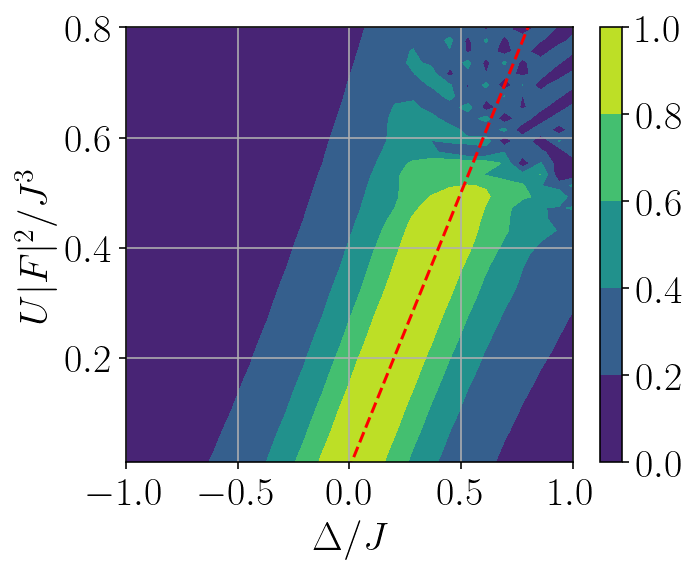

In [8]:
plt.rcParams["figure.figsize"] = [5, 4]
fig, ax = plt.subplots(1, 1)
fs = 20

cp = ax.contourf(Delta_list, g*F_list**2/t_c**3, ll_list, levels=np.arange(0, 1+0.2, 0.2))
cbar = fig.colorbar(cp, ticks=np.arange(0, 1+0.2, 0.2))
cbar.ax.tick_params(labelsize=fs)

ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8])
ax.set_xlim(-1, 1)
ax.set_ylim(0.01, 0.8)

ax.set_xlabel(r'$\Delta/J$',fontsize=fs)
ax.set_ylabel(r'$U|F|^2/J^3$',fontsize=fs)
ax.tick_params(axis='both', labelsize=fs)

ax.grid()

ax.plot(Delta_list, Delta_list, '--r')

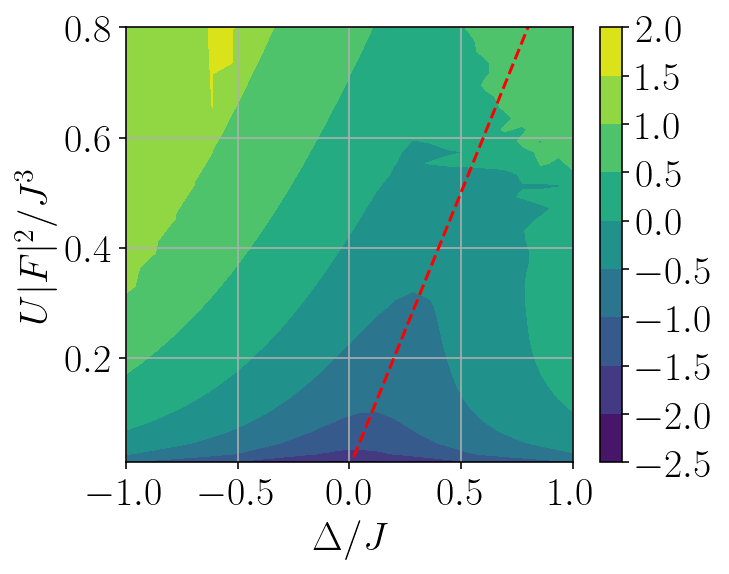

In [9]:
plt.rcParams["figure.figsize"] = [5, 4]
fig, ax = plt.subplots(1, 1)
fs = 20

cp = ax.contourf(Delta_list, g*F_list**2/t_c**3, np.log10(g*np.array(I_T_list)/t_c)) # , levels=np.arange(0, 5+1, 1)
cbar = fig.colorbar(cp) # , ticks=np.arange(0, 5+1, 1)
cbar.ax.tick_params(labelsize=fs)

ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8])
ax.set_xlim(-1, 1)
ax.set_ylim(0.01, 0.8)

ax.set_xlabel(r'$\Delta/J$',fontsize=fs)
ax.set_ylabel(r'$U|F|^2/J^3$',fontsize=fs)
ax.tick_params(axis='both', labelsize=fs)

ax.grid()

ax.plot(Delta_list, Delta_list, '--r')